<a href="https://colab.research.google.com/github/ayanoglu/CNNs-CIFAR-color-vs-greyscale/blob/main/CNNs_CIFAR_color_vs_greyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170508288/170498071 [==============================] - 6s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
782/782 - 209s - loss: 2.9519 - accuracy: 0.3455 - val_loss: 2.6503 - val_accuracy: 0.4523
Epoch 2/10
782/782 - 207s - loss: 2.5905 - accuracy: 0.4670 - val_loss: 2.5814 - val_accuracy: 0.4742
Epoch 3/10
782/782 - 207s - loss: 2.4203 - accuracy: 0.5192 - val_loss: 2.3361 - val_accuracy: 0.5463
Epoch 4/10
782/782 - 206s - loss: 2.2857 - accuracy: 0.5574 - val_loss: 2.1834 - val_accuracy: 0.5860
Epoch 5/10
782/782 - 206s - loss: 2.1740 - accuracy: 0.5878 - val_loss: 2.1074 - val_accuracy: 0.6073
Epoch 6/10
782/782 - 207s - loss: 2.0761 - accuracy: 0.6131 - val_loss: 2.0648 - val_accuracy: 0.6123
Epoch 7/10
782/782 - 207s - loss: 1.9891 - accuracy: 0.6370 - val_loss: 1.9633 - val_accuracy: 0.6477
Epoch 8/10
782/782 - 207s - loss: 1.9153 - accuracy: 0.6539 - val_loss: 1.9645 - val_accuracy: 0.6315
Epoch 9/10
782/782 - 207s - loss: 1.8374 - accuracy: 0.6722 - val_loss: 1.8769 - val_accuracy: 0.6554
Epoch 10/10
782/782 - 208s - loss: 1.7681 - accuracy: 0.6887 - val_loss: 1.8256 - 

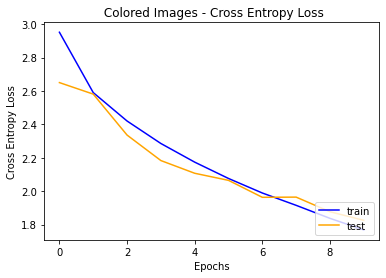

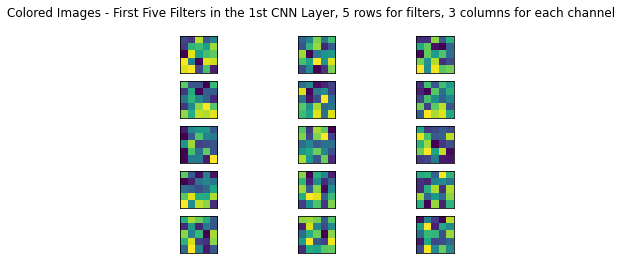

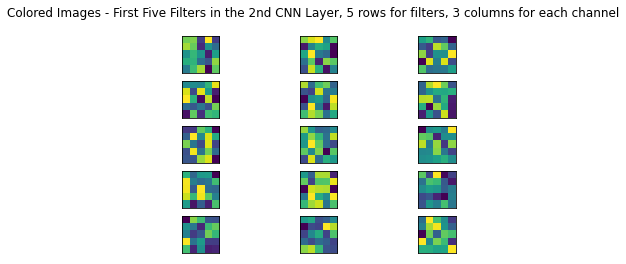

PART B. GRAYSCALE IMAGES
X_train_gray shape: (50000, 32, 32, 1)
X_test_gray shape: (10000, 32, 32, 1)


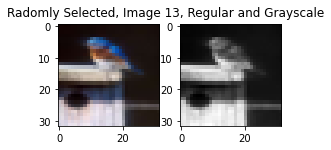

Epoch 1/10
782/782 - 197s - loss: 3.1103 - accuracy: 0.2827 - val_loss: 2.8822 - val_accuracy: 0.3643
Epoch 2/10
782/782 - 196s - loss: 2.7915 - accuracy: 0.3967 - val_loss: 2.6695 - val_accuracy: 0.4390
Epoch 3/10
782/782 - 195s - loss: 2.6173 - accuracy: 0.4535 - val_loss: 2.5059 - val_accuracy: 0.4829
Epoch 4/10
782/782 - 195s - loss: 2.4740 - accuracy: 0.4943 - val_loss: 2.3793 - val_accuracy: 0.5250
Epoch 5/10
782/782 - 195s - loss: 2.3535 - accuracy: 0.5280 - val_loss: 2.2838 - val_accuracy: 0.5510
Epoch 6/10
782/782 - 194s - loss: 2.2520 - accuracy: 0.5570 - val_loss: 2.2162 - val_accuracy: 0.5612
Epoch 7/10
782/782 - 195s - loss: 2.1624 - accuracy: 0.5792 - val_loss: 2.1197 - val_accuracy: 0.5906
Epoch 8/10
782/782 - 195s - loss: 2.0799 - accuracy: 0.6002 - val_loss: 2.0509 - val_accuracy: 0.6027
Epoch 9/10
782/782 - 199s - loss: 2.0017 - accuracy: 0.6185 - val_loss: 2.0125 - val_accuracy: 0.6077
Epoch 10/10
782/782 - 194s - loss: 1.9307 - accuracy: 0.6369 - val_loss: 1.9630 - 

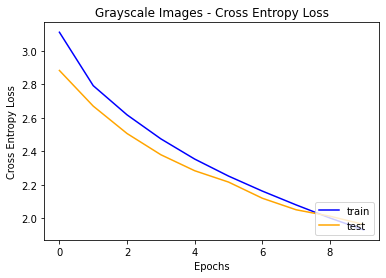

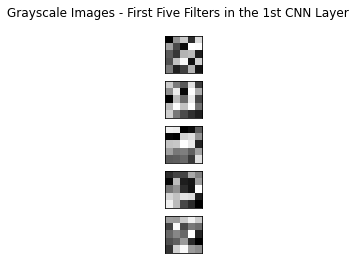

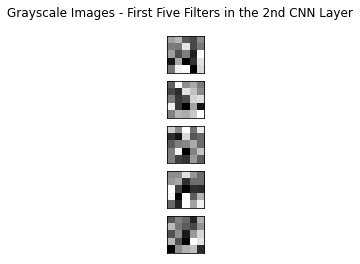

In [3]:
import sys
import numpy as np
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from keras import regularizers

# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

RL2 = 0.001 # Reg L2
LR = 0.001 # Learning rate

# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

def grayscale(data, dtype='float32'):
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    rst = np.expand_dims(rst, axis=3)
    return rst

def model1():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(384, kernel_regularizer=regularizers.l2(RL2), activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(192, kernel_regularizer=regularizers.l2(RL2), activation='relu', kernel_initializer='he_uniform'))
    #model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))  
    # compile model
    opt = SGD(lr=LR, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
    # fit model
    history1 = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY), verbose=2)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    
    # retrieve weights from the first hidden layer
    filters1, biases1 = model.layers[0].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f1_min, f1_max = filters1.min(), filters1.max()
    filters1 = (filters1 - f1_min) / (f1_max - f1_min)
    
    # retrieve weights from the second hidden layer
    filters2, biases2 = model.layers[2].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f2_min, f2_max = filters2.min(), filters2.max()
    filters2 = (filters2 - f2_min) / (f2_max - f2_min)
    
    return [acc, filters1, filters2], history1

def model2():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(384, kernel_regularizer=regularizers.l2(RL2), activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.2))
    model.add(Dense(192, kernel_regularizer=regularizers.l2(RL2), activation='relu', kernel_initializer='he_uniform'))
    #model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))   
    # compile model
    opt = SGD(lr=LR, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    # fit model
    history2 = model.fit(X_train_gray, trainY, epochs=10, batch_size=64, validation_data=(X_test_gray, testY), verbose=2)
    # evaluate model
    _, acc = model.evaluate(X_test_gray, testY, verbose=0)
    
    # retrieve weights from the first hidden layer
    filters1, biases1 = model.layers[0].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f1_min, f1_max = filters1.min(), filters1.max()
    filters1 = (filters1 - f1_min) / (f1_max - f1_min)
    
    # retrieve weights from the second hidden layer
    filters2, biases2 = model.layers[2].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f2_min, f2_max = filters2.min(), filters2.max()
    filters2 = (filters2 - f2_min) / (f2_max - f2_min)
    
    return [acc, filters1, filters2], history2

Results1, history1 = model1()
acc1 = Results1[0]
filtersM1_L1 = Results1[1]
filtersM1_L2 = Results1[2]

print("Colored Images - Classification accuracy on the test set: " ' %.3f' % (acc1 * 100.0))
# learning curves

# plot loss
# pyplot.subplot(211)
pyplot.title(' Colored Images - Cross Entropy Loss')
pyplot.plot(history1.history['loss'], color='blue', label='train')
pyplot.plot(history1.history['val_loss'], color='orange', label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy Loss')
#pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')
pyplot.show()

# FIRST FIVE FILTERS ON CNN LAYER 1
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filtersM1_L1[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(f[:, :, j])
		ix += 1
# show the figure
pyplot.suptitle('Colored Images - First Five Filters in the 1st CNN Layer, 5 rows for filters, 3 columns for each channel')
pyplot.show()

# FIRST FIVE FILTERS ON CNN LAYER 2
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filtersM1_L2[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(f[:, :, j])
		ix += 1
# show the figure
pyplot.suptitle('Colored Images - First Five Filters in the 2nd CNN Layer, 5 rows for filters, 3 columns for each channel')
pyplot.show()


print("PART B. GRAYSCALE IMAGES")

X_train_gray = grayscale(trainX)
X_test_gray = grayscale(testX)

print('X_train_gray shape:', X_train_gray.shape)
print('X_test_gray shape:', X_test_gray.shape)

# SHOW THE GRAYSCALE VERSION OF A RANDOM IMAGE
img = 13
pyplot.figure(figsize=(4, 2))
pyplot.subplot(1, 2, 1)
pyplot.imshow(trainX[img], interpolation='none')
pyplot.subplot(1, 2, 2)
pyplot.imshow(X_train_gray[img, :, :, 0], cmap=pyplot.get_cmap('gray'), interpolation='none')
pyplot.suptitle('Radomly Selected, Image 13, Regular and Grayscale')
pyplot.show()

Results2, history2 = model2()
acc2 = Results2[0]
filtersM2_L1 = Results2[1]
filtersM2_L2 = Results2[2]

print("Grayscale Images - Classification accuracy on the test set: " ' %.3f' % (acc2 * 100.0))
# learning curves

# plot loss
# pyplot.subplot(211)
pyplot.title('Grayscale Images - Cross Entropy Loss')
pyplot.plot(history2.history['loss'], color='blue', label='train')
pyplot.plot(history2.history['val_loss'], color='orange', label='test')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cross Entropy Loss')
#pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')
pyplot.show()

# FIRST FIVE FILTERS ON CNN LAYER 1
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filtersM2_L1[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 1, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.suptitle('Grayscale Images - First Five Filters in the 1st CNN Layer')
pyplot.show()

# FIRST FIVE FILTERS ON CNN LAYER 2
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filtersM2_L2[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 1, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.suptitle('Grayscale Images - First Five Filters in the 2nd CNN Layer')
pyplot.show()